# Task 1: Student Score Prediction



### Step 1: Import Libraries


In [12]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

### Step 2: Load Dataset

In [35]:
df = pd.read_csv(r"D:\eleevo internship\task1\studentperformancefactors.csv")
df.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


### Step 3: Explore the Dataset

In [27]:
# Shape of dataset (rows, columns)
print("Shape of dataset:", df.shape)

# Column names
print("\nColumns in dataset:", df.columns.tolist())



Shape of dataset: (6607, 20)

Columns in dataset: ['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender', 'Exam_Score']


In [29]:
# Data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [30]:
# Summary statistics (mean, min, max, etc.)
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
       Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000

In [31]:
# Check missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


### Step 4: Data Cleaning

In [32]:
# 1) Check for missing values
print('missing values in each column:')
print(df.isnull().sum())

missing values in each column:
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [36]:
# 2) Fill missing categorical values with mode
df['Teacher_Quality'] = df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0])
df['Parental_Education_Level'] = df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0])
df['Distance_from_Home'] = df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0])



In [38]:
print("Missing values after cleaning:\n")
print(df.isnull().sum())

Missing values after cleaning:

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


### Step 5: Visualization (EDA)

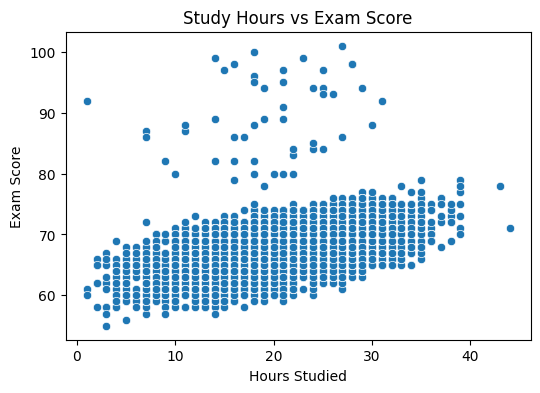

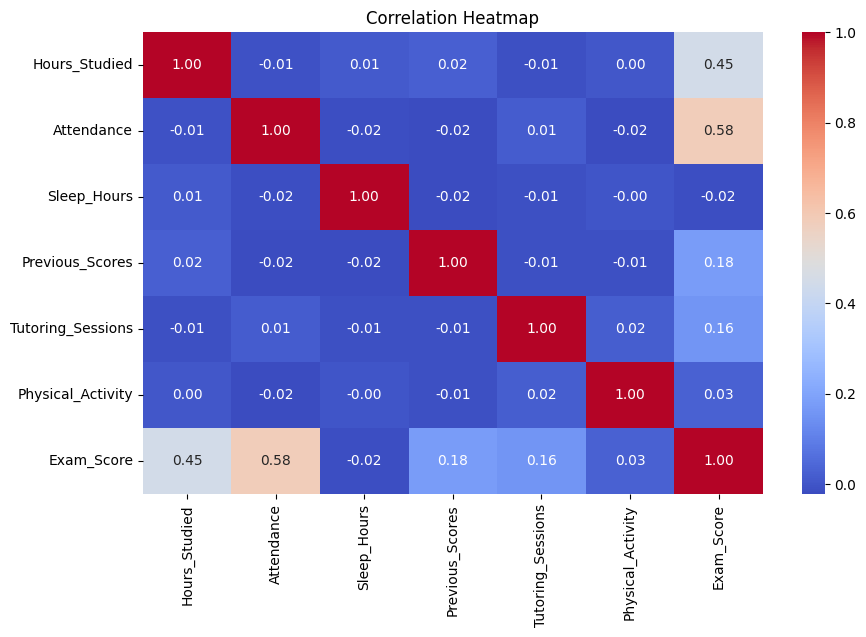

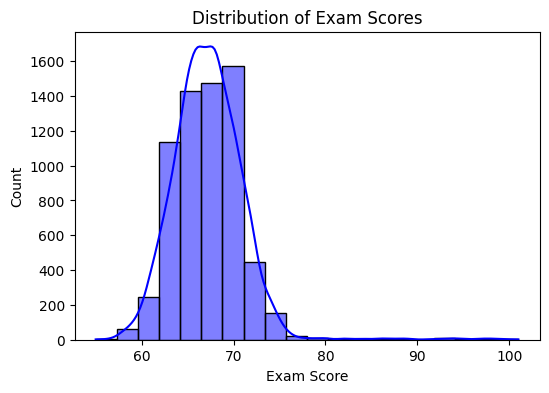

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Study Hours vs Exam Score (Scatter Plot)
plt.figure(figsize=(6,4))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=df)
plt.title("Study Hours vs Exam Score")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.show()

# 2) Correlation Heatmap 
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 3) Distribution of Exam Scores
plt.figure(figsize=(6,4))
sns.histplot(df['Exam_Score'], bins=20, kde=True, color='blue')
plt.title("Distribution of Exam Scores")
plt.xlabel("Exam Score")
plt.ylabel("Count")
plt.show()

### Step 6: Preparing Data for Model

In [41]:
X = df[['Hours_Studied']]   # feature
y = df['Exam_Score']        # target

# Split data into training (80%) and testing (20%)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 5285
Testing set size: 1322


### Step 7: Train Linear Regression Model

In [42]:
from sklearn.linear_model import LinearRegression

# Create the model
model = LinearRegression()

# Train (fit) the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Show first 10 predictions vs actual values
comparison = pd.DataFrame({'Actual': y_test.values[:10], 'Predicted': y_pred[:10]})
print(comparison)


   Actual  Predicted
0      65  67.224542
1      65  67.795880
2      71  67.510211
3      64  64.939192
4      66  67.510211
5      66  67.510211
6      72  72.080911
7      66  68.367217
8      70  66.367536
9      70  66.081867


### Step 8: Model Evaluation

In [43]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# R² score
r2 = r2_score(y_test, y_pred)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error
rmse = np.sqrt(mse)

print("Model Evaluation Metrics:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Model Evaluation Metrics:
R² Score: 0.2320
Mean Absolute Error (MAE): 2.45
Mean Squared Error (MSE): 10.86
Root Mean Squared Error (RMSE): 3.29


### Step 9: Visualization of Predictions

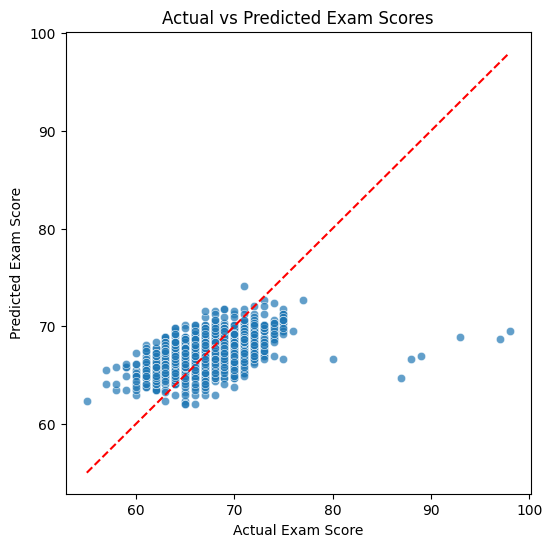

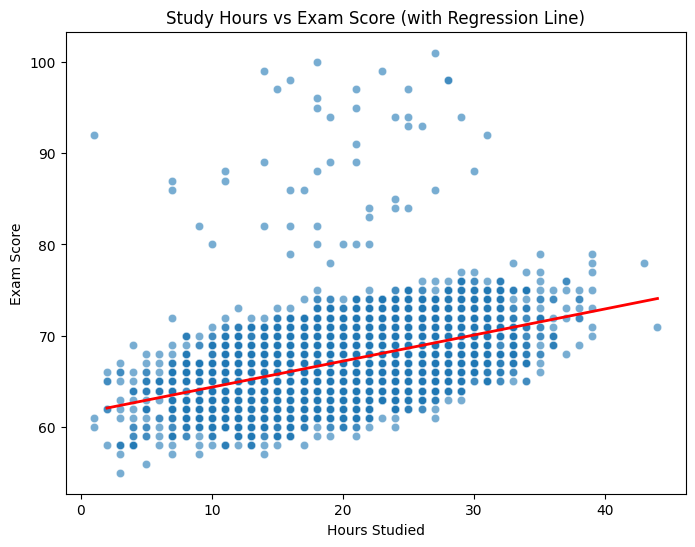

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Actual vs Predicted Scatter Plot
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs Predicted Exam Scores")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.show()

# 2) Regression Line (Study Hours vs Exam Score)
plt.figure(figsize=(8,6))
sns.scatterplot(x="Hours_Studied", y="Exam_Score", data=df, alpha=0.6)
sns.lineplot(x=X_test['Hours_Studied'], y=y_pred, color="red", linewidth=2)
plt.title("Study Hours vs Exam Score (with Regression Line)")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.show()


# Summary of Task 1

---

## Task 1: Student Score Prediction  

### Description:
- Dataset: `studentperformancefactors.csv`  
- Goal: Predict exam scores of students using study hours and other academic/lifestyle factors.  

### Steps & Outcomes:
1. **Preprocessing**
   - Handled missing values:
     - Numeric → filled with mean.
     - Categorical → filled with mode.
   - Target: `Exam_Score`.  

2. **Exploratory Data Analysis (EDA)**
   - Scatter plots showed strong positive relation between `Hours_Studied` and `Exam_Score`.  
   - However, other lifestyle factors (sleep, motivation, tutoring) also influence performance.  

3. **Train/Test Split**
   - Training: 5285 samples  
   - Testing: 1322 samples  

4. **Model Training (Linear Regression)**
   - R² Score: **0.23** → model explains only ~23% of variance.  
   - Mean Absolute Error (MAE): 2.45  
   - Root Mean Squared Error (RMSE): 3.29  

5. **Evaluation**
   - Predictions follow the trend but have wide error margins.  
   - Low R² shows that study hours alone are insufficient to predict scores reliably.  

### Insights:
- Exam scores depend on multiple factors beyond hours studied.  
- Adding more features (motivation, resources, parental education, etc.) could improve model accuracy.